# Visualizing Gaze Data for CXR-P

In this demo, we showcase how to load gaze data for CXR-P, and visualize it using heatmaps and saccade plots.

In [1]:
import sys, os
import numpy as np

os.chdir("../")
from utils import load_gaze_data, make_heatmaps
from viz_utils import plot_saccade, plot_heatmap

## (1) Retrieve gaze and image data

The gaze sequences are of the form [(x1,y1,t1), (x2,y2,t2),..., (xT,yT,tT)], 

where (x,y) are the coordinates on the screen, and t is the time spent fixating on that location.

The length of the sequences, T, is different for each image.

In [2]:
gaze_seqs, labels, img_pths = load_gaze_data(source="cxr",split_type="val",return_img_pths=True)
heatmaps = make_heatmaps(gaze_seqs,num_patches=8)

# change data_dir to the directory you have the CXR-P dicom images saved
data_dir = 'dicom-images-test'
img_pths = [os.path.join(data_dir,img_pth) for img_pth in img_pths]

191 files in val split...
191 gaze sequences in val split...


## (2) Plot heatmap 

In [3]:
# choose a random (image,gaze) pair
ndx = np.random.randint(len(img_pths))
img_pth, gaze_seq, heatmap = img_pths[ndx], gaze_seqs[ndx], heatmaps[ndx].squeeze()

FileNotFoundError: [Errno 2] No such file or directory: 'test/1.2.276.0.7230010.3.1.2.8323329.2020.1517875170.725652/1.2.276.0.7230010.3.1.3.8323329.2020.1517875170.725651/1.2.276.0.7230010.3.1.4.8323329.2020.1517875170.725653.dcm'

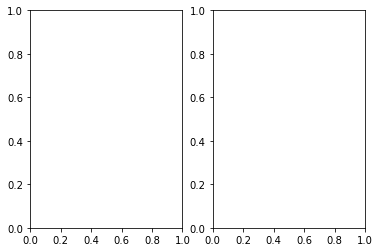

In [4]:
plot_heatmap(source="cxr",img_pth=img_pth,heatmap=heatmap)

## (3) Plot saccade

In [ ]:
plot_saccade(img_pth, gaze_seq, source="cxr")